In [6]:
from skimage import io 
import pydicom as dicom
import numpy as np 
import time
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt 
from skimage import color
from skimage.morphology import erosion, dilation, opening, closing,disk
from skimage import measure
from skimage.color import label2rgb
import matplotlib.pyplot as plt 
import pandas as pd 
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage import io, transform



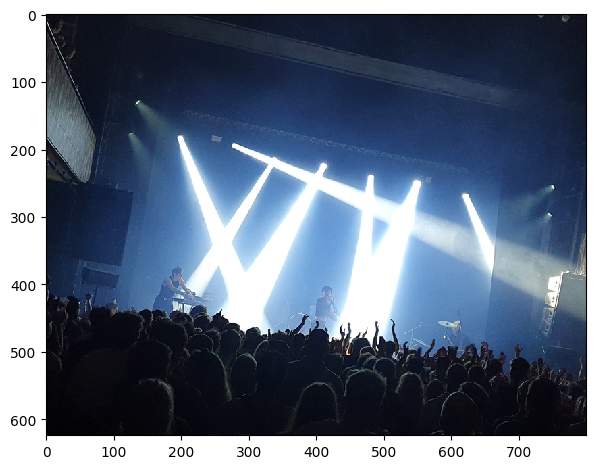

In [7]:
dir = "data/"
img = io.imread(dir+"lights.png")
io.imshow(img)

### Rotates the image 11 degrees with a rotation center of (40, 40).


In [12]:

def rotate_image(image, degrees=11, rotation_center=(40, 40)):
    """
    Rotate the image by a specified angle with a given rotation center.

    Parameters:
    - image_path (str): Path to the image file.
    - degrees (float): Angle of rotation in degrees.
    - rotation_center (tuple): Rotation center coordinates (x, y).

    Returns:
    - rotated_image: Rotated image.
    """

    # Translate the image to bring the rotation center to the origin
    translation_matrix1 = transform.SimilarityTransform(translation=-np.array(rotation_center))

    # Rotate the translated image
    rotation_matrix = transform.SimilarityTransform(rotation=np.radians(degrees))
    
    # Translate the rotated image back to the original position
    translation_matrix2 = transform.SimilarityTransform(translation=np.array(rotation_center))

    # Combine the transformations
    final_transform = translation_matrix2 + rotation_matrix + translation_matrix1

    # Apply the transformations to the image
    rotated_image = transform.warp(image, final_transform.inverse, mode='reflect')

    return rotated_image



In [15]:
rotated = rotate_image(img)

### Transform the image from RGB to gray scale.


In [17]:
img = color.rgb2gray(rotated)

### Computes an automatic threshold using Otsu's method.


In [20]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(img)

### Computes the percentage of foreground pixels.


In [24]:
bin_img = img>thresh

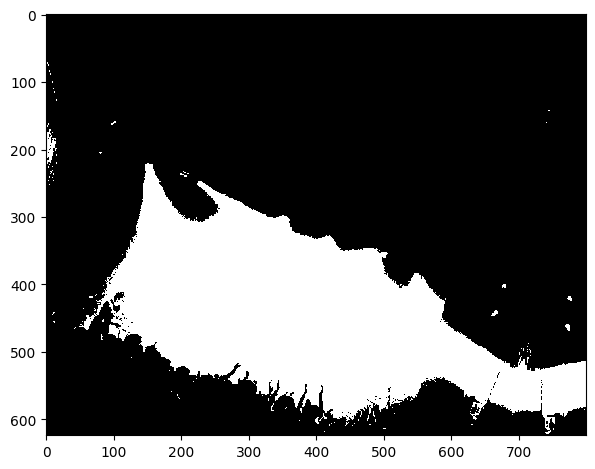

In [25]:
io.imshow(bin_img)

#### What is the percentage of foreground pixels in the final image+




In [28]:
foreground_total = np.sum(bin_img==1)

In [37]:
foreground_total / bin_img.size *100

25.319110576923077

In [39]:
thresh

0.4586270333661915